CNN for Classification

In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import BatchNormalization

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


Parameters

In [2]:
BATCH_SIZE = 128
N_EPOCH = 50 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop(learning_rate=0.001, rho=0.9)

In [3]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [4]:
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

170508288/170498071 [==============================] - 3s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
batch_normalization = True
model = Sequential()

dropout=0.3

model.add( Conv2D(32, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform',padding='same', input_shape=(32, 32, 3) ) )
model.add(BatchNormalization())
model.add( Conv2D(32, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform',padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.2))

model.add( Conv2D(64, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3) ) )
model.add(BatchNormalization())
model.add( Conv2D(64, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.25))

model.add( Conv2D(128, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3) ) )
model.add(BatchNormalization())
model.add( Conv2D(128, kernel_size=(3,3),strides=(1,1), activation='relu', kernel_initializer='he_uniform', padding='same') )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# # Compile model
# epochs = 50
# batch_size = 128
# rms = RMSprop(learning_rate=0.001, rho=0.9)

# model.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=rms,
#               metrics=['accuracy'])

# model.summary()


In [6]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [7]:
print(input_X_train.shape)

(50000, 32, 32, 3)


In [8]:
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/50
313/313 [==============================] - 21s 23ms/step - loss: 1.6979 - accuracy: 0.4430 - val_loss: 1.5826 - val_accuracy: 0.4508
Epoch 2/50
313/313 [==============================] - 6s 21ms/step - loss: 1.1146 - accuracy: 0.6074 - val_loss: 1.0426 - val_accuracy: 0.6409
Epoch 3/50
313/313 [==============================] - 6s 21ms/step - loss: 0.8927 - accuracy: 0.6853 - val_loss: 0.7998 - val_accuracy: 0.7212
Epoch 4/50
313/313 [==============================] - 6s 21ms/step - loss: 0.7678 - accuracy: 0.7283 - val_loss: 0.7018 - val_accuracy: 0.7559
Epoch 5/50
313/313 [==============================] - 6s 21ms/step - loss: 0.6833 - accuracy: 0.7593 - val_loss: 0.6968 - val_accuracy: 0.7537
Epoch 6/50
313/313 [==============================] - 7s 21ms/step - loss: 0.6210 - accuracy: 0.7832 - val_loss: 0.6489 - val_accuracy: 0.7749
Epoch 7/50
313/313 [==============================] - 6s 21ms/step - loss: 0.5617 - accuracy: 0.8016 - val_loss: 0.5954 - val_accuracy: 0.797

In [9]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


79/79 [==============================] - 1s 6ms/step - loss: 0.7185 - accuracy: 0.8187

Test score/loss: 0.7185115814208984
Test accuracy: 0.8187000155448914
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


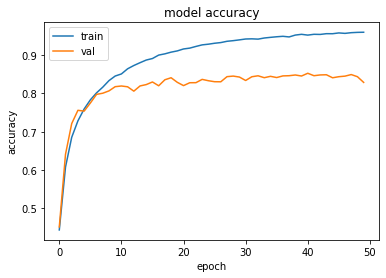

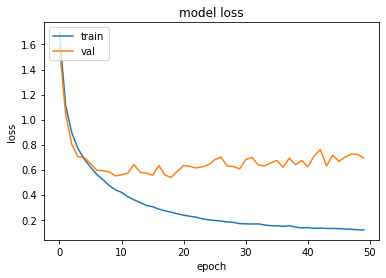

In [10]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()